In [ ]:
import nltk
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
!pip install langdetect

     |████████████████████████████████| 983kB 6.6MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-cp37-none-any.whl size=993242 sha256=e5a3632fb4297d0ec1b873ba1ee8695c29db94d11c01b05a46e2a5b4f36e7c84
  Stored in directory: /root/.cache/pip/wheels/7e/18/13/038c34057808931c7ddc6c92d3aa015cf1a498df5a70268996
Successfully built langdetect


In [ ]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
# Authentication
consumerKey = '398CFhjDeUtvqr5hTst0Mj6Zb'
consumerSecret ='xwBhnGYvyLkWjL3vIShGTSa1dPbWxk28dUxswDiaL6q88v6pJu'
accessToken = '1393937049917399040-onzgrEzq28abboUAGJ49Pq80yCgRlz'
accessTokenSecret = 'Y0vNc4FKtONCgGOQCbYjvKYz9f3kSWVtLBqVFTWh5rVxj'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
SentimentIntensityAnalyzer().polarity_scores('I hate this pandemic')

{'compound': -0.5719, 'neg': 0.649, 'neu': 0.351, 'pos': 0.0}

In [ ]:
#Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)
keyword = input('Please enter keyword or hashtag to search: ')
noOfTweet = int(input ('Please enter how many tweets to analyze: '))
#tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
tweets = api.search(q=keyword, count = noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
 
 #print(tweet.text)
 tweet_list.append(tweet.text)
 analysis = TextBlob(tweet.text)
 score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 polarity += analysis.sentiment.polarity
 
 if neg > pos:
     negative_list.append(tweet.text)
     negative += 1
 elif pos > neg:
     positive_list.append(tweet.text)
     positive += 1
 
 elif pos == neg:
     neutral_list.append(tweet.text)
     neutral += 1
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: Vaccine
Please enter how many tweets to analyze: 100


In [ ]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print('total number: ',len(tweet_list))
print('positive number: ',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

total number:  100
positive number:  33
negative number:  21
neutral number:  46


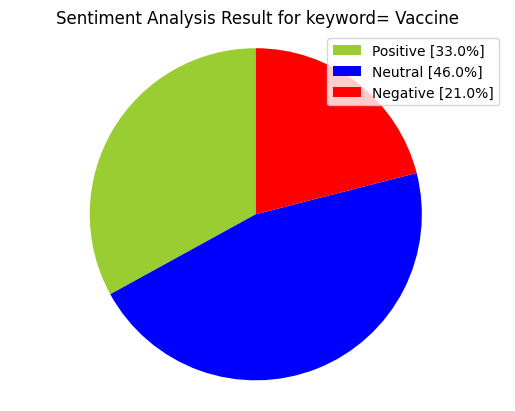

In [ ]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('Sentiment Analysis Result for keyword= '+keyword+'' )
plt.axis('equal')
plt.show()

In [ ]:
tweet_list

0
0   RT @SaketGokhale: I paid full price for my Cov...
1   RT @CancerIntegral: Israel: probable vínculo d...
2      First vaccine shot:  ✅ https://t.co/hMMYlOcFHB
3   RT @news7tamil: #JUSTIN | "தமிழ்நாட்டில் 34 மா...
4   Introducing the other alternative vaccine late...
..                                                ...
95  @NickdMiller @leighsales That's because lockdo...
96  RT @heidegger79: Nurse won't take vaccine - sc...
97  @OfficialNcoc When Pfizer vaccine is available...
98  RT @crosshairsonyou: 👀👇👇\nhttps://t.co/pzScOo5IZ2
99  RT @DrGodseRavi1: Which is the best vaccine? O...

[100 rows x 1 columns]

In [ ]:
tweet_list.drop_duplicates(inplace = True)

In [ ]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list['text'] = tw_list[0]
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: ','',x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ",x)
tw_list['text'] = tw_list.text.map(remove_rt).map(rt)
tw_list['text'] = tw_list.text.str.lower()
tw_list.head(10)

0                                               text
0  RT @SaketGokhale: I paid full price for my Cov...  i paid full price for my covid 19 vaccination ...
1  RT @CancerIntegral: Israel: probable vínculo d...  israel  probable v nculo de tratamiento experi...
2     First vaccine shot:  ✅ https://t.co/hMMYlOcFHB                           first vaccine shot      
3  RT @news7tamil: #JUSTIN | "தமிழ்நாட்டில் 34 மா...   justin                  34                   ...
4  Introducing the other alternative vaccine late...  introducing the other alternative vaccine late...
5  I'm hearing many are disappointed with their v...  i m hearing many are disappointed with their v...
6  RT @rishikeshlaw: This is a nice initiative an...  this is a nice initiative and if sufficient am...
7  Very conveniently the same slaves to foreign v...  very conveniently the same slaves to foreign v...
8  RT @TheTNHoller: OHIO: Anti-vaccine *expert* w...  ohio  anti vaccine  expert  witness claims vac...
9  RT @kottur_lover22: バズらしいクソ記事。\n https://t.co/...

In [ ]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[["polarity", "subjectivity"]] = tw_list["text"].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list["text"].iteritems():
 score = SentimentIntensityAnalyzer().polarity_scores(row)
 neg = score["neg"]
 neu = score["neu"]
 pos = score["pos"]
 comp = score["compound"]
 if neg > pos:
  tw_list.loc[index, "sentiment"] = "negative"
 elif pos > neg:
  tw_list.loc[index, "sentiment"] = "positive"
 else:
  tw_list.loc[index, "sentiment"] = "neutral"
  tw_list.loc[index, "neg"] = neg
  tw_list.loc[index, "neu"] = neu
  tw_list.loc[index, "pos"] = pos
  tw_list.loc[index, "compound"] = comp
  
tw_list.head(10)

0  ... compound
0  RT @SaketGokhale: I paid full price for my Cov...  ...      0.0
1  RT @CancerIntegral: Israel: probable vínculo d...  ...      0.0
2     First vaccine shot:  ✅ https://t.co/hMMYlOcFHB  ...      0.0
3  RT @news7tamil: #JUSTIN | "தமிழ்நாட்டில் 34 மா...  ...      0.0
4  Introducing the other alternative vaccine late...  ...      NaN
5  I'm hearing many are disappointed with their v...  ...      NaN
6  RT @rishikeshlaw: This is a nice initiative an...  ...      NaN
7  Very conveniently the same slaves to foreign v...  ...      NaN
8  RT @TheTNHoller: OHIO: Anti-vaccine *expert* w...  ...      NaN
9  RT @kottur_lover22: バズらしいクソ記事。\n https://t.co/...  ...      0.0

[10 rows x 9 columns]

In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [ ]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=["Total","Percentage"])
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

Total  Percentage
neutral      42       44.68
positive     29       30.85
negative     23       24.47

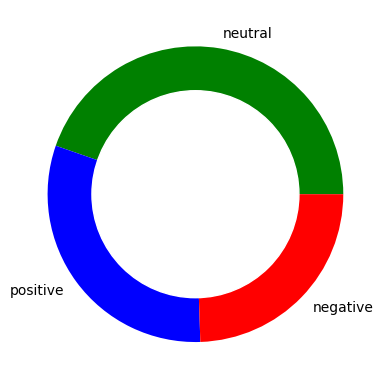

In [ ]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names = pichart.index
size= pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color="white")
plt.pie(size, labels=names, colors=["green","blue","red"])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
#Function to Create Wordcloud
def create_wordcloud(text):
 mask = np.array(Image.open("Gambar awan (1).png"))
 stopwords = set(STOPWORDS)
 wc = WordCloud(background_color="white",
                mode = "RGBA",
 mask = mask,
 max_words=3000,
 stopwords=stopwords,
 repeat=True)
 wc.generate(str(text))
 wc.to_file("wc.png")
 print("Word Cloud Saved Successfully")
 path="wc.png"
 display(Image.open(path))


Word Cloud Saved Successfully


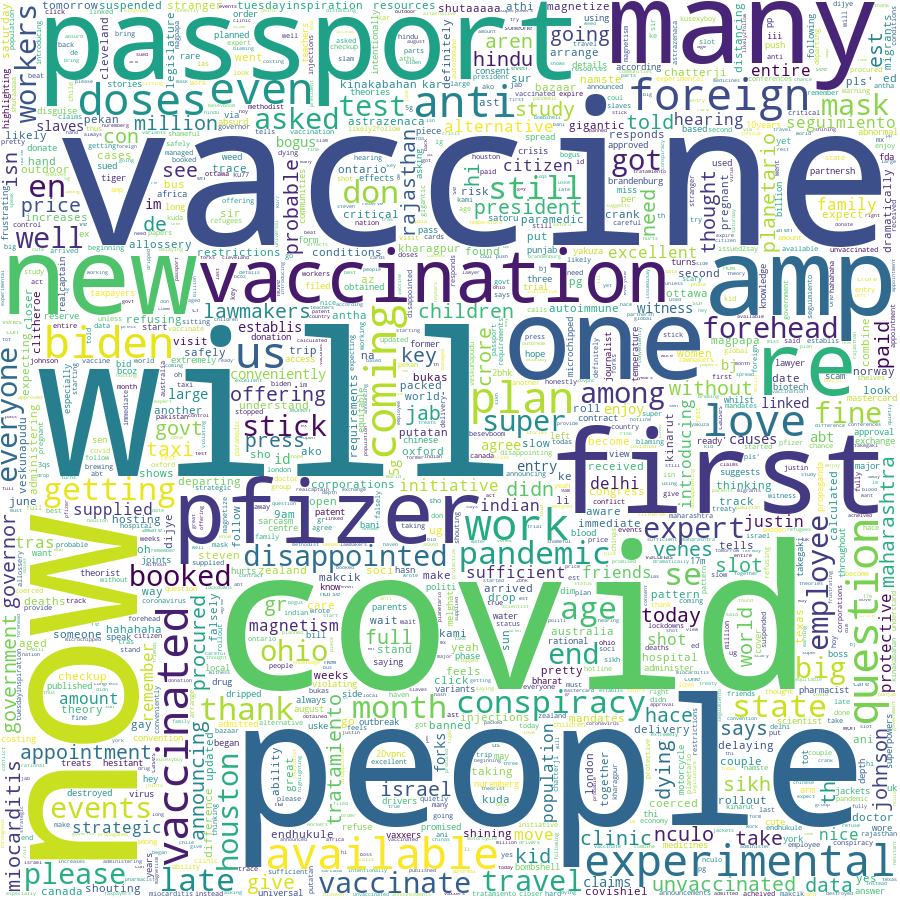

In [ ]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


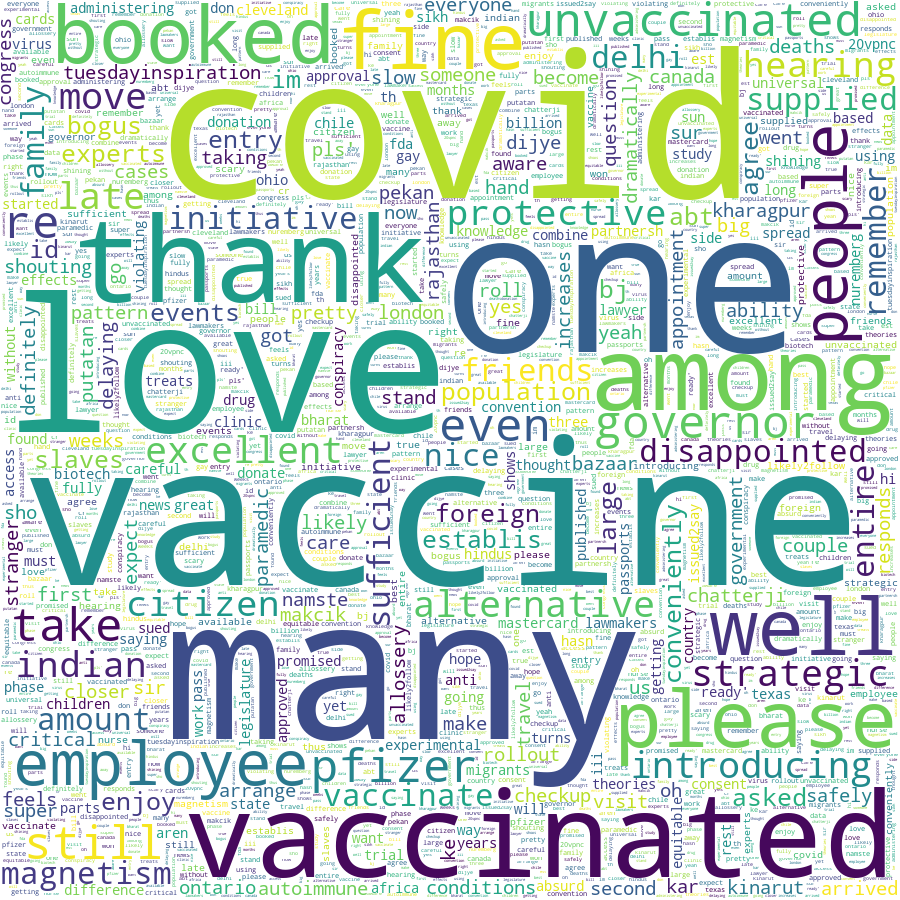

In [ ]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


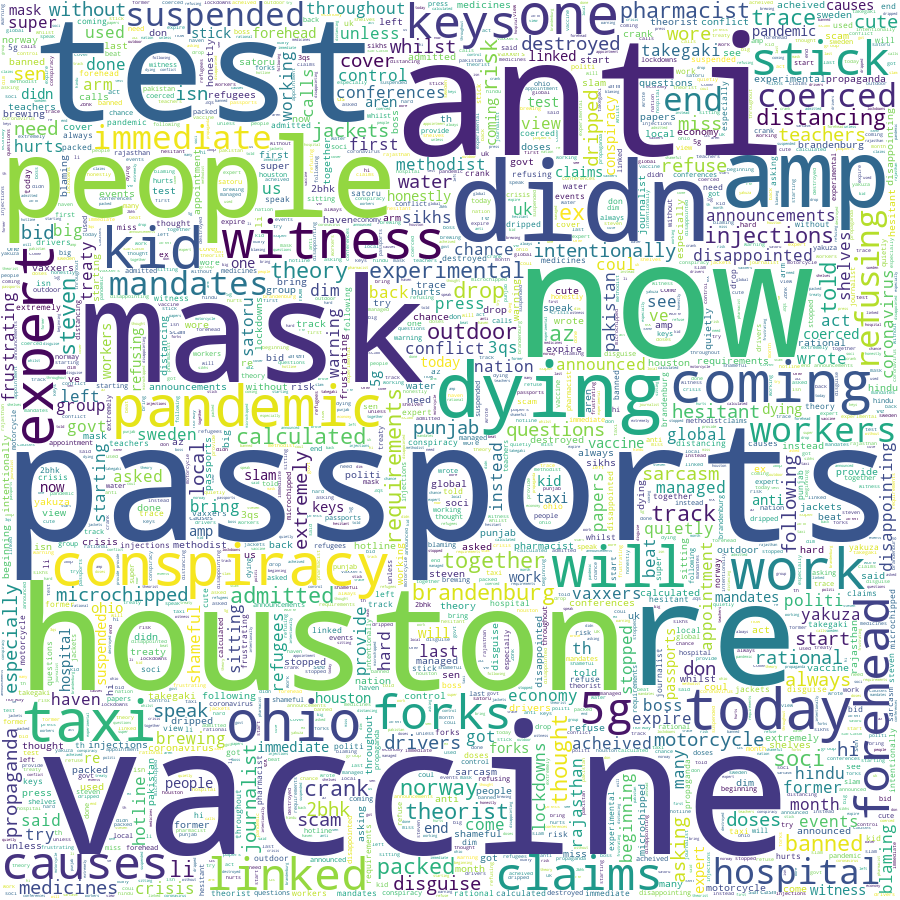

In [ ]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


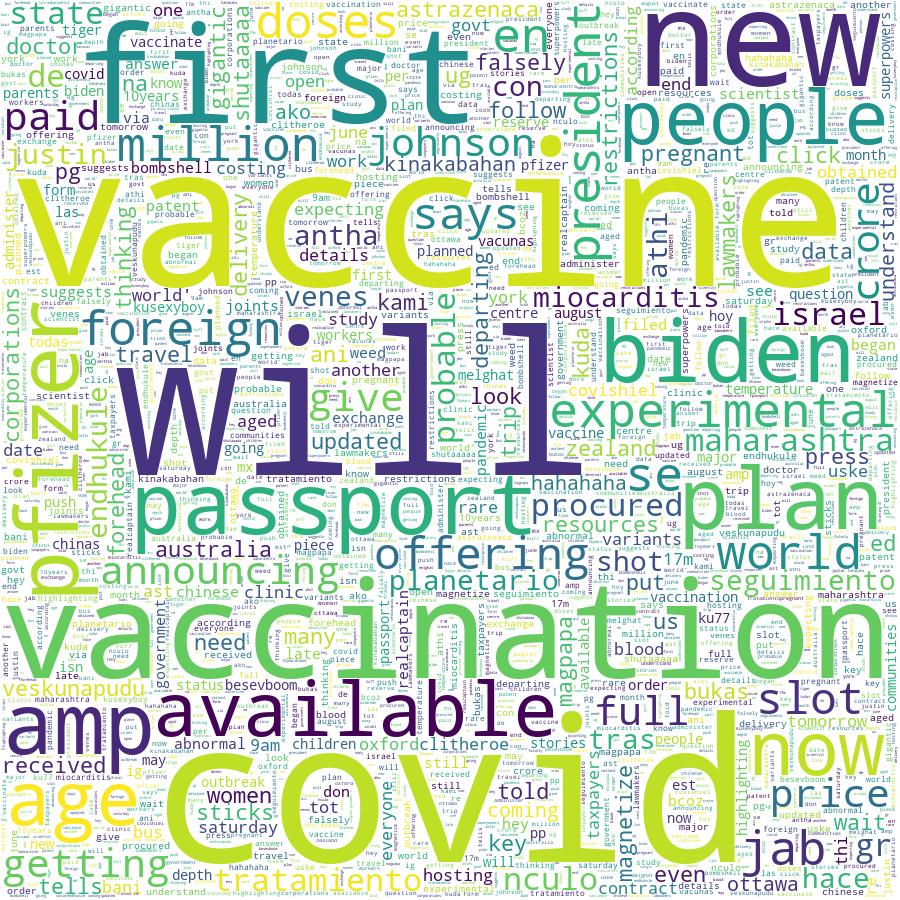

In [ ]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_neutral["text"].values)

In [ ]:
#Calculating tweet’s lenght and word count
tw_list["text_len"] = tw_list["text"].astype(str).apply(len)
tw_list["text_word_count"] = tw_list["text"].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

text_len
sentiment          
negative     111.78
neutral       83.60
positive     107.03

In [ ]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

text_word_count
sentiment                 
negative             19.13
neutral              11.33
positive             18.24

In [ ]:
#Removing Punctuation
def remove_punct(text):
 text = "".join([char for char in text if char not in string.punctuation])
 text = re.sub("[0–9]+", "", text)
 return text
tw_list["punct"] = tw_list["text"].apply(lambda x: remove_punct(x))
#Appliyng tokenization
def tokenization(text):
    text = re.split("\W+", text)
    return text
tw_list["tokenized"] = tw_list["punct"].apply(lambda x: tokenization(x.lower()))
#Removing stopwords
stopword = nltk.corpus.stopwords.words("english")
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list["nonstop"] = tw_list["tokenized"].apply(lambda x: remove_stopwords(x))
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
tw_list["stemmed"] = tw_list["nonstop"].apply(lambda x: stemming(x))
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub("[0-9]+", "", text_lc)
    tokens = re.split("\W+", text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text
tw_list.head()

0  ...                                            stemmed
0  RT @SaketGokhale: I paid full price for my Cov...  ...  [paid, full, price, covid, 1, vaccin, vaccin, ...
1  RT @CancerIntegral: Israel: probable vínculo d...  ...  [israel, probabl, v, nculo, de, tratamiento, e...
2     First vaccine shot:  ✅ https://t.co/hMMYlOcFHB  ...                            [first, vaccin, shot, ]
3  RT @news7tamil: #JUSTIN | "தமிழ்நாட்டில் 34 மா...  ...                                   [, justin, 34, ]
4  Introducing the other alternative vaccine late...  ...  [introduc, altern, vaccin, late, excel, strate...

[5 rows x 15 columns]

In [ ]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list["text"])
print("{} Number of reviews has {} words".format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

94 Number of reviews has 550 words


abil  abnorm  absurd  abt  access  ...  ye  yeah  year  yet  york  zealand
0  1     0       0       0    0       0  ...   0     0     0    0     0        0
1  1     0       0       0    0       0  ...   0     0     0    0     0        0
2  1     0       0       0    0       0  ...   0     0     0    0     0        0
3  2     0       0       0    0       0  ...   0     0     0    0     0        0
4  1     0       0       0    0       0  ...   0     0     0    0     0        0

[5 rows x 550 columns]

In [ ]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

0
vaccin    82
covid     12
one        7
get        7
passport   7
peopl      7
first      5
j          5
amp        5
mani       5

In [ ]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
 vec = CountVectorizer(ngram_range=ngram_range,stop_words = "english").fit(corpus)
 bag_of_words = vec.transform(corpus)
 sum_words = bag_of_words.sum(axis=0) 
 words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
 words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
 return words_freq[:n]
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list["text"],(2,2),20)
n2_bigrams



#n3_trigram
n3_trigrams = get_top_n_gram(tw_list["text"],(3,3),20)
n3_trigrams

[('covid 19 vaccine', 23),
 ('covid 19 covid', 5),
 ('files conditional marketing', 5),
 ('conditional marketing approval', 5),
 ('estadodealarma toquedequeda covid19', 4),
 ('toquedequeda covid19 covid', 4),
 ('covid19 covid 19', 4),
 ('19 covid 19', 4),
 ('moderna files conditional', 4),
 ('marketing approval covid', 4),
 ('approval covid 19', 4),
 ('19 vaccine adolescents', 4),
 ('vaccine adolescents european', 4),
 ('adolescents european union', 4),
 ('year india launched', 3),
 ('india launched india', 3),
 ('covid 19 vaccines', 3),
 ('nilimchapia mathe tuishie', 2),
 ('mathe tuishie akadungwe', 2),
 ('tuishie akadungwe covid', 2)]